## **YouTube Shorts Performance Exploratory Data Analysis**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# loading file
data = pd.read_csv('youtube_shorts_performance_dataset.csv')
# Preview
data.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech


In [62]:
# Shape
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 300
Columns: 10


In [63]:
# Data types
print(data.dtypes)

video_id          object
title             object
duration_sec       int64
hashtags_count     int64
views              int64
likes              int64
comments           int64
shares             int64
upload_hour        int64
category          object
dtype: object


In [64]:
# Summary stats
data.describe()

,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,31.730000,4.343333,245058.166667,23063.126667,2638.296667,999.576667,11.543333
std,16.042912,2.956562,141338.982093,14597.458220,1416.827287,564.410105,6.814414
min,5.000000,0.000000,1404.000000,109.000000,40.000000,2.000000,0.000000
25%,18.000000,2.000000,129620.500000,10342.000000,1445.750000,516.250000,6.000000
50%,32.000000,4.000000,255962.000000,21779.500000,2863.500000,988.000000,12.000000
75%,45.000000,7.000000,356805.000000,36706.500000,3761.000000,1463.750000,17.000000
max,59.000000,9.000000,499401.000000,49923.000000,4971.000000,1998.000000,23.000000


In [67]:
# 3. Missing values
print(data.isnull().sum())

video_id          0
title             0
duration_sec      0
hashtags_count    0
views             0
likes             0
comments          0
shares            0
upload_hour       0
category          0
dtype: int64


In [68]:
# duplicates
print(data.duplicated().sum())

0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **FEATURE ENGINEERING**

In [70]:
# 4. New metrics
data["engagement"] = data["likes"] + data["comments"] + data["shares"]
data["engagement_rate"] = data["engagement"] / data["views"]
data.head()

,video_id,title,duration_sec,hashtags_count,views,likes,comments,shares,upload_hour,category,engagement,engagement_rate
0,vid_1000,Short Video #0,43,9,198775,21933,3228,400,8,Tech,25561,0.128593
1,vid_1001,Short Video #1,56,2,290336,20063,3719,1942,16,Comedy,25724,0.088601
2,vid_1002,Short Video #2,33,6,264206,37032,3228,1817,7,Food,42077,0.159258
3,vid_1003,Short Video #3,19,9,85076,27269,2371,980,1,Lifestyle,30620,0.359913
4,vid_1004,Short Video #4,47,8,90780,8041,2891,1109,23,Tech,12041,0.132639


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **UNIVARIATE ANALYSIS**

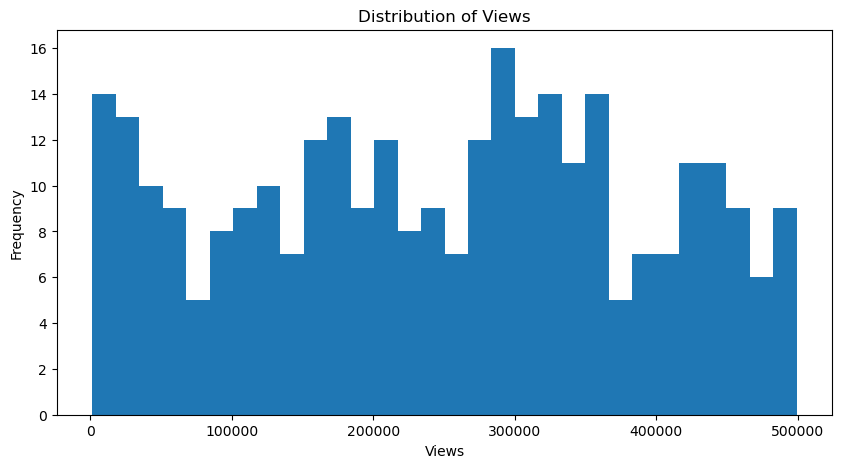

In [75]:
# Views distribution
plt.figure(figsize=(10,5))
plt.hist(data["views"], bins=30)
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.show()

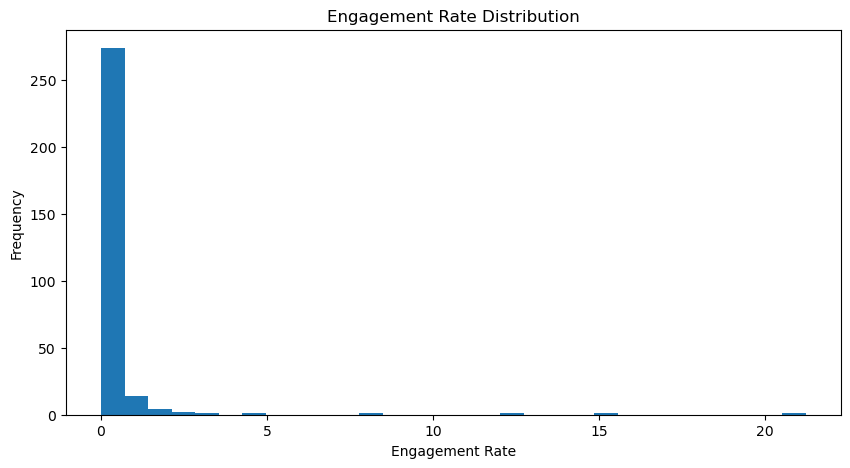

In [77]:
# Engagement Rate Distribuition
plt.figure(figsize=(10,5))
plt.hist(data["engagement_rate"], bins=30)
plt.title("Engagement Rate Distribution")
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.show()

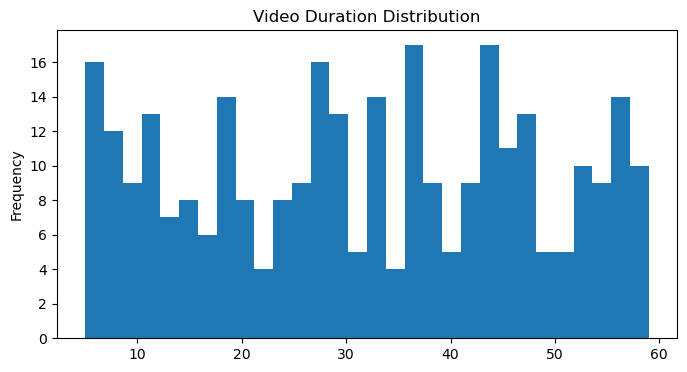

In [78]:
# Duration
data["duration_sec"].plot(kind="hist", bins=30, figsize=(8,4), title="Video Duration Distribution")
plt.show()

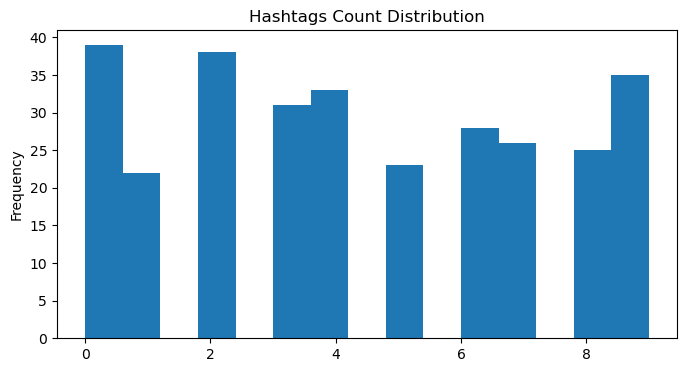

In [79]:
# Hashtags Usage
data["hashtags_count"].plot(kind="hist", bins=15, figsize=(8,4), title="Hashtags Count Distribution")
plt.show()

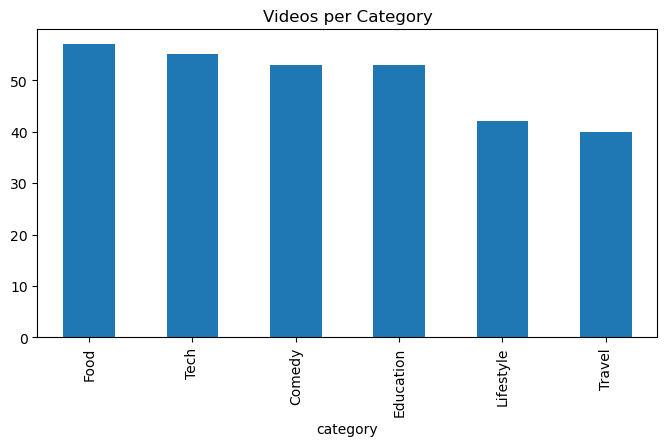

In [80]:
# Category Count
data["category"].value_counts().plot(kind="bar", figsize=(8,4), title="Videos per Category")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **BIVARIATE ANALYSIS (Relationships)**

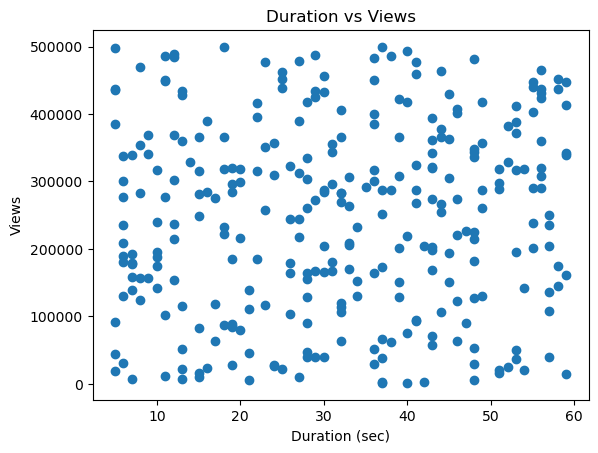

In [81]:
# Duration vs Views
plt.scatter(data["duration_sec"], data["views"])
plt.title("Duration vs Views")
plt.xlabel("Duration (sec)")
plt.ylabel("Views")
plt.show()

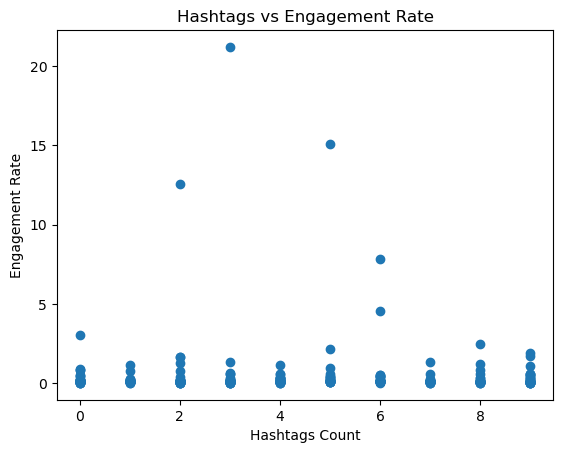

In [82]:
# Hashtages vs Engagement Rate
plt.scatter(data["hashtags_count"], data["engagement_rate"])
plt.title("Hashtags vs Engagement Rate")
plt.xlabel("Hashtags Count")
plt.ylabel("Engagement Rate")
plt.show()

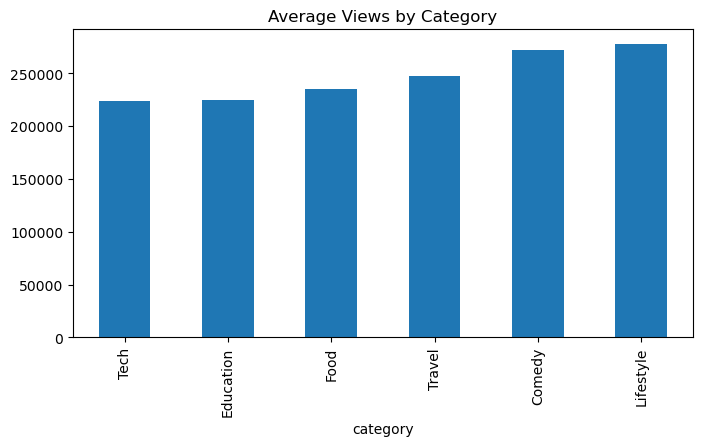

In [84]:
# Category vs Avg.Views
data.groupby("category")["views"].mean().sort_values().plot(kind="bar", figsize=(8,4), title="Average Views by Category")
plt.show()

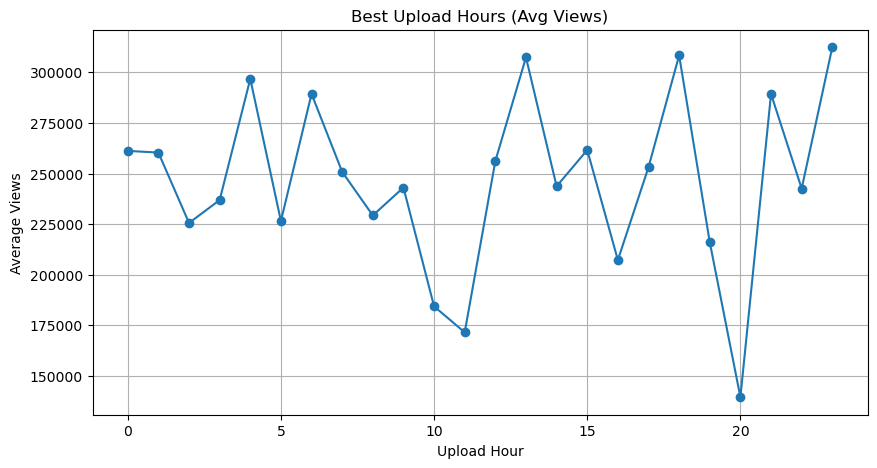

In [85]:
# Upload Hours vs Views
data.groupby("upload_hour")["views"].mean().plot(kind="line", figsize=(10,5), marker="o")
plt.title("Best Upload Hours (Avg Views)")
plt.xlabel("Upload Hour")
plt.ylabel("Average Views")
plt.grid(True)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **CORRELATION HEATMAP**

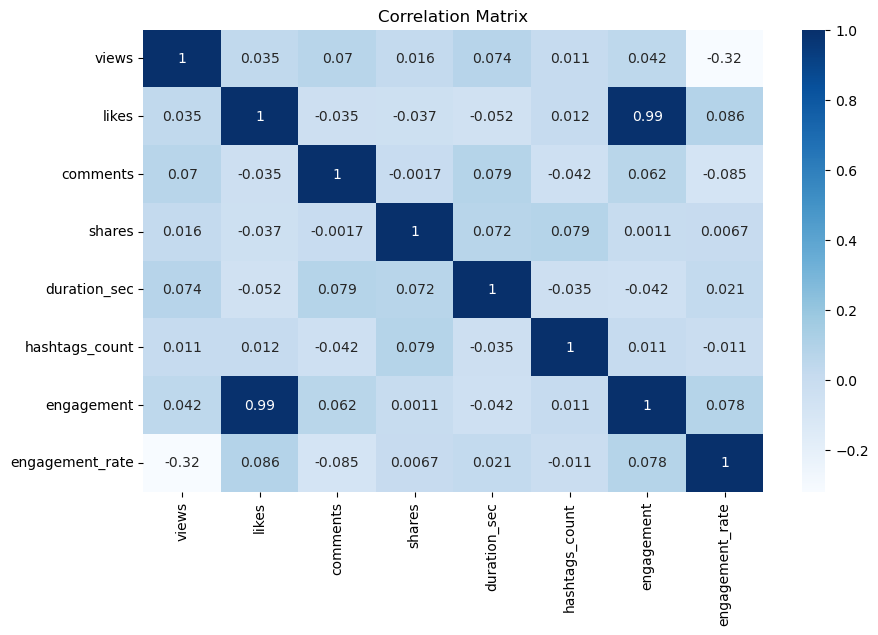

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(data[["views","likes","comments","shares","duration_sec","hashtags_count","engagement","engagement_rate"]]
            .corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### **VIRAL VIDEO ANALYSIS**

In [90]:
threshold = data["views"].quantile(0.90)
viral = data[data["views"] >= threshold]

print("Viral Video Count:", viral.shape[0])

viral.describe()

# Compare viral vs non-viral
comp = data.copy()
comp["is_viral"] = np.where(data["views"] >= threshold, "Viral", "Normal")

comp.groupby("is_viral")[["duration_sec","hashtags_count","engagement_rate"]].mean()

Viral Video Count: 30


,duration_sec,hashtags_count,engagement_rate
is_viral,,,
Normal,31.648148,4.277778,0.471454
Viral,32.466667,4.933333,0.062688
